In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
data = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [105]:
data.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [106]:
data.shape

(103, 7)

# Data Cleaning

In [107]:
data['Production (Tons)'] = data['Production (Tons)'].str.replace(".","")
data['Production per Person (Kg)'] = data['Production per Person (Kg)'].str.replace(".","").str.replace(",",".")
data['Acreage (Hectare)'] = data['Acreage (Hectare)'].str.replace(".","")
data['Yield (Kg / Hectare)'] = data['Yield (Kg / Hectare)'].str.replace(".","").str.replace(",",".")

In [108]:
data.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [109]:
data.rename(columns= {"Production (Tons)" : "Production(Tons)"}, inplace = True)
data.rename(columns= {"Production per Person (Kg)" : "Production_per_Person(Kg)"}, inplace = True)
data.rename(columns= {"Acreage (Hectare)" : "Acreage(Hectare)"}, inplace = True)
data.rename(columns= {"Yield (Kg / Hectare)" : "Yield(Kg / Hectare)"}, inplace = True)

In [110]:
data.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [111]:
data.isnull().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg / Hectare)          1
dtype: int64

In [112]:
data = data.dropna().reset_index()

In [113]:
data.head()

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [114]:
data.isnull().sum()

index                        0
Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             0
Yield(Kg / Hectare)          0
dtype: int64

In [115]:
data.drop(["index", "Unnamed: 0"], axis= 1, inplace = True)

In [116]:
data.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [117]:
data.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg / Hectare)          object
dtype: object

In [118]:
data['Production(Tons)'] = data['Production(Tons)'].astype("float")
data['Production_per_Person(Kg)'] = data['Production_per_Person(Kg)'].astype("float")
data['Acreage(Hectare)'] = data['Acreage(Hectare)'].astype("float")
data['Yield(Kg / Hectare)'] = data['Yield(Kg / Hectare)'].astype("float")

In [119]:
data.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg / Hectare)          float64
dtype: object

# Univariate Analysis

In [120]:
data.sample(5)

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
68,Gabon,Africa,286466.0,138553.0,4645.0,61675.3
63,Morocco,Africa,426503.0,12265.0,10434.0,40876.3
91,Malaysia,Asia,5714.0,175.0,88.0,65223.8
83,Saint Vincent and the Grenadines,North America,17871.0,163121.0,732.0,24428.9
54,Cameroon,Africa,1288732.0,54162.0,135984.0,9477.1


## How many countries produces sugarcane from each continent

In [121]:
data['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

In [122]:
# sns.barplot(data['Continent'].value_counts()) # By using seaborn

<Axes: xlabel='Continent'>

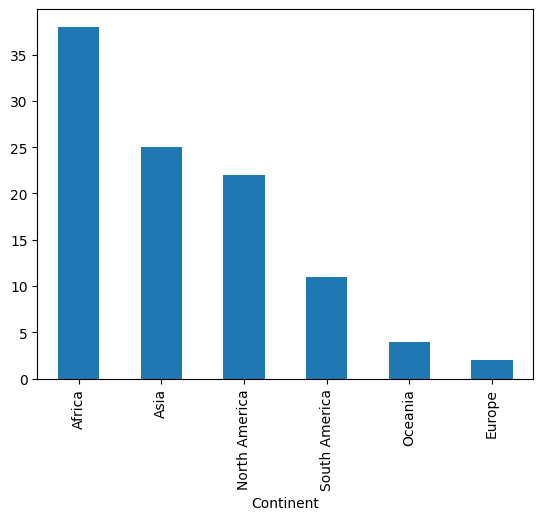

In [123]:
data['Continent'].value_counts().plot(kind = "bar") # by using matplotlib

C:\Users\91932\AppData\Local\Temp\ipykernel_16660\2301030138.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Production(Tons)'])
C:\Users\91932\AppData\Local\Temp\ipykernel_16660\2301030138.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Production_per_Person(Kg)'])
C:\Users\

<Axes: xlabel='Yield(Kg / Hectare)', ylabel='Density'>

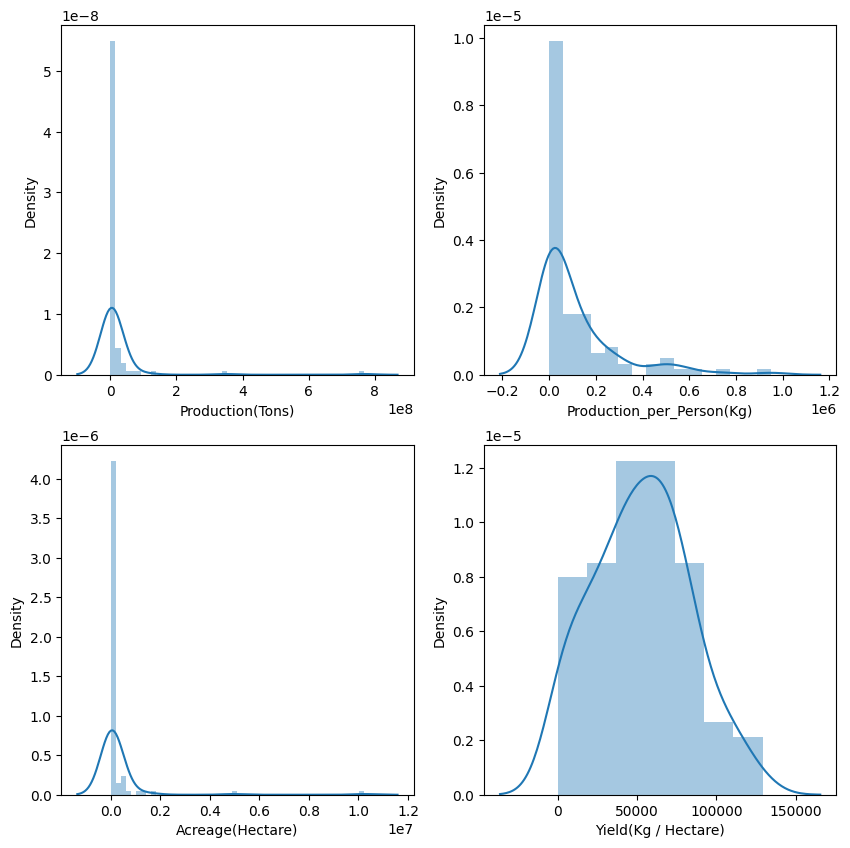

In [124]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.distplot(data['Production(Tons)'])

plt.subplot(2,2,2)
sns.distplot(data['Production_per_Person(Kg)'])

plt.subplot(2,2,3)
sns.distplot(data['Acreage(Hectare)'])

plt.subplot(2,2,4)
sns.distplot(data['Yield(Kg / Hectare)'])

<Axes: ylabel='Yield(Kg / Hectare)'>

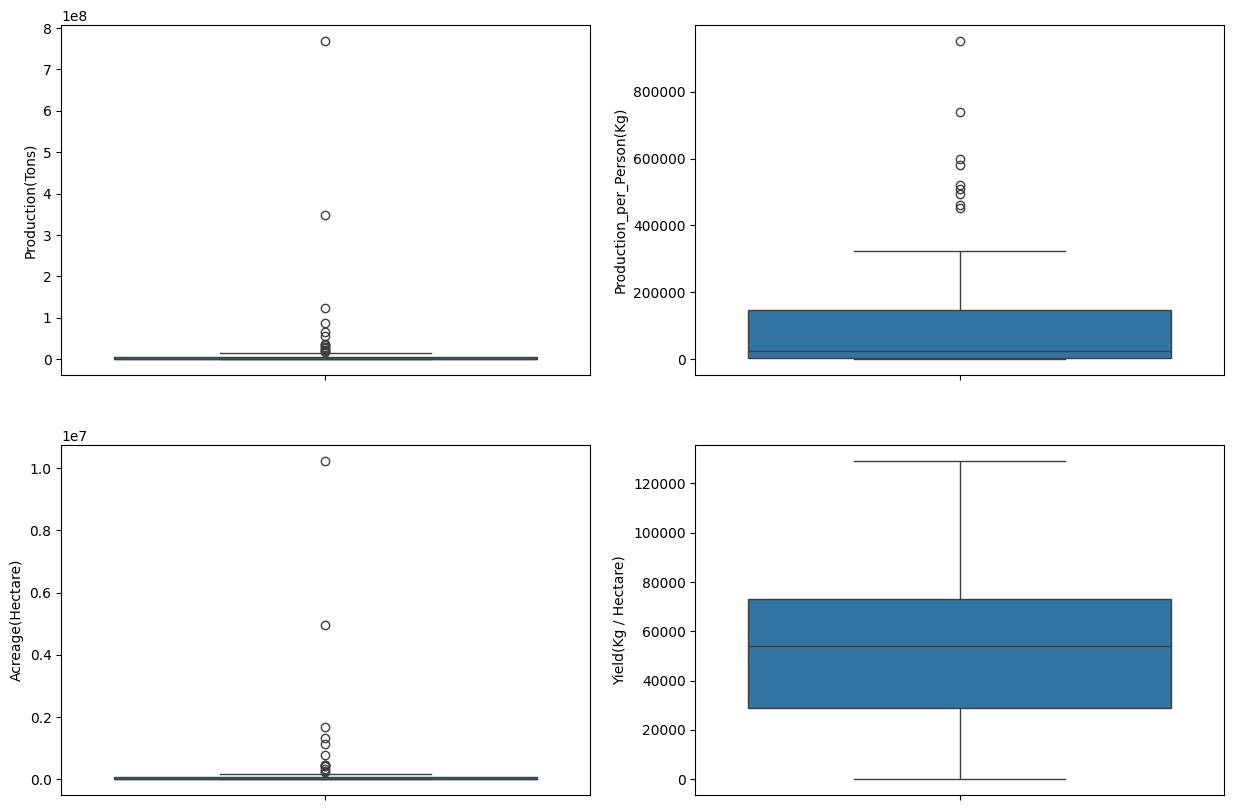

In [125]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
sns.boxplot(data['Production(Tons)'])

plt.subplot(2,2,2)
sns.boxplot(data['Production_per_Person(Kg)'])

plt.subplot(2,2,3)
sns.boxplot(data['Acreage(Hectare)'])

plt.subplot(2,2,4)
sns.boxplot(data['Yield(Kg / Hectare)'])

In [126]:
data.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


# Bi-variate Analysis

In [127]:
df = data[["Country", "Production(Tons)"]].set_index("Country")

In [128]:
df["Production(Tons)_percent"] = df["Production(Tons)"] * 100 / df["Production(Tons)"].sum()
df

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

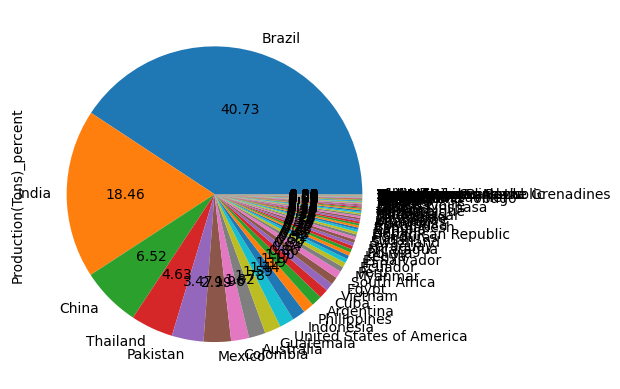

In [129]:
df["Production(Tons)_percent"].plot(kind = "pie", autopct = "%.2f")

<Axes: xlabel='Country'>

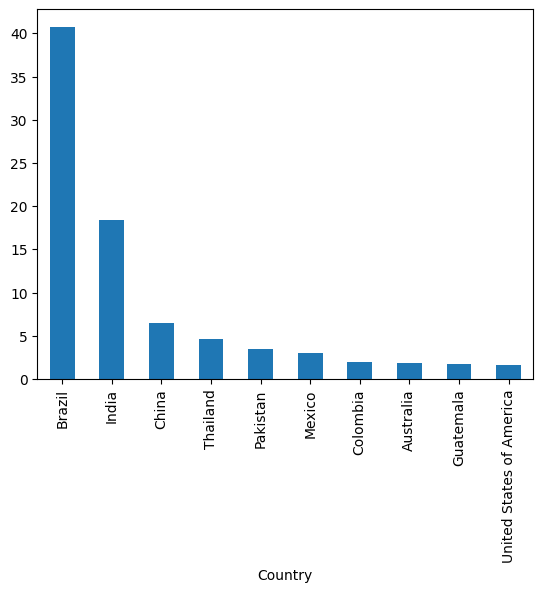

In [130]:
df["Production(Tons)_percent"].head(10).plot(kind = "bar")

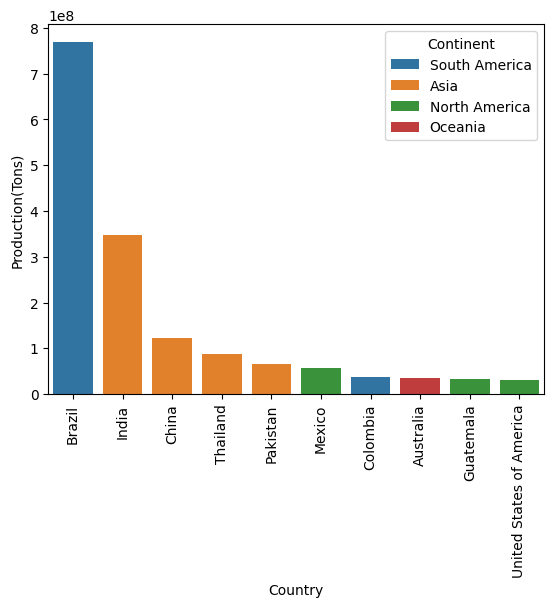

In [131]:
ax = sns.barplot(data = data.head(10), x = "Country", y = "Production(Tons)", hue = "Continent")
plt.xticks(rotation = 90)
plt.show()

In [132]:
data.select_dtypes(include = "float").corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_Person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg / Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

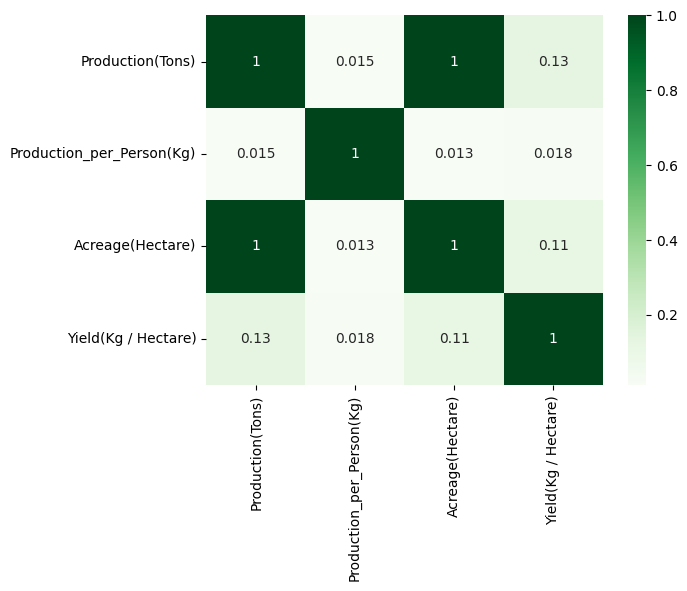

In [133]:
sns.heatmap(data = data.select_dtypes(include = "float").corr(), annot = True, cmap = "Greens")

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

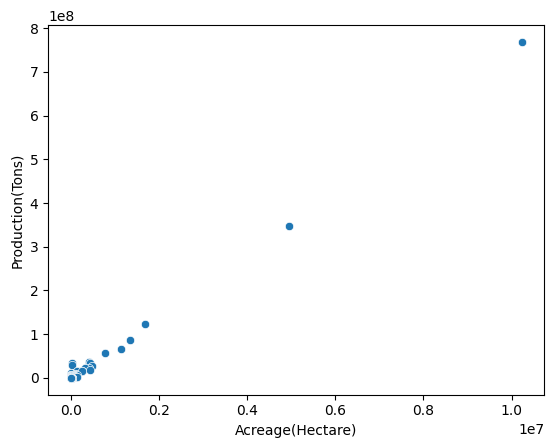

In [134]:
sns.scatterplot(data = data, x = "Acreage(Hectare)", y = "Production(Tons)")

In [138]:
df_continent = data.groupby("Continent").sum()

In [139]:
df_continent["Country_count"] = data.groupby("Continent").count()["Country"]

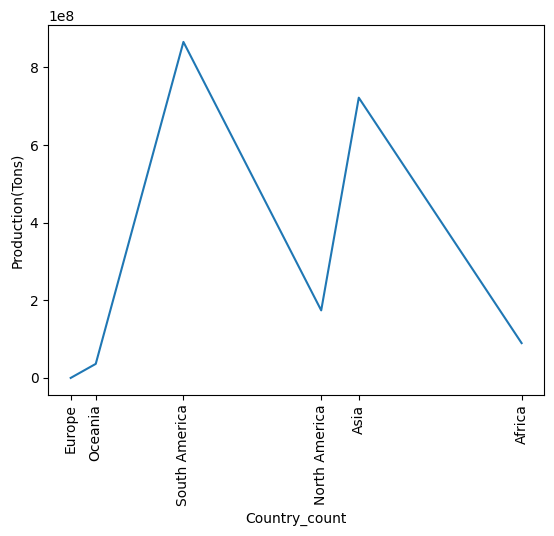

In [148]:
sns.lineplot(data = df_continent, x = "Country_count", y = "Production(Tons)")
plt.xticks(df_continent["Country_count"], df_continent.index.to_list(), rotation = 90)
plt.show()